In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [146]:
x = pd.read_csv('test_log_3.csv').values

In [147]:
stats.ttest_ind(x[:,3],x[:,4], equal_var = False)

Ttest_indResult(statistic=4.480343220253128, pvalue=3.894569328245368e-05)

In [148]:
x.min(axis=0)

array([67.15853574, 58.68196393, 72.04646049, 63.97400674, 51.33553565,
       57.38474339])

In [149]:
x = np.clip(x, a_min = None, a_max = 190)

In [150]:
# Python implementation of the Nadeau and Bengio correction of dependent Student's t-test
# using the equation stated in https://www.cs.waikato.ac.nz/~eibe/pubs/bouckaert_and_frank.pdf

from scipy.stats import t
from math import sqrt
from statistics import stdev

def corrected_dependent_ttest(data1, data2, n_training_folds, n_test_folds, alpha):
    n = len(data1)
    differences = [(data1[i]-data2[i]) for i in range(n)]
    sd = stdev(differences)
    divisor = 1 / n * sum(differences)
    test_training_ratio = n_test_folds / n_training_folds  
    denominator = sqrt(1 / n + test_training_ratio) * sd
    t_stat = divisor / denominator
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [151]:
corrected_dependent_ttest(x[:,3],x[:,4], 85, 15, 0.5)

(1.642597579222337, 49, 6.671941392032297e-17, 0.10686921344720357)

In [152]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

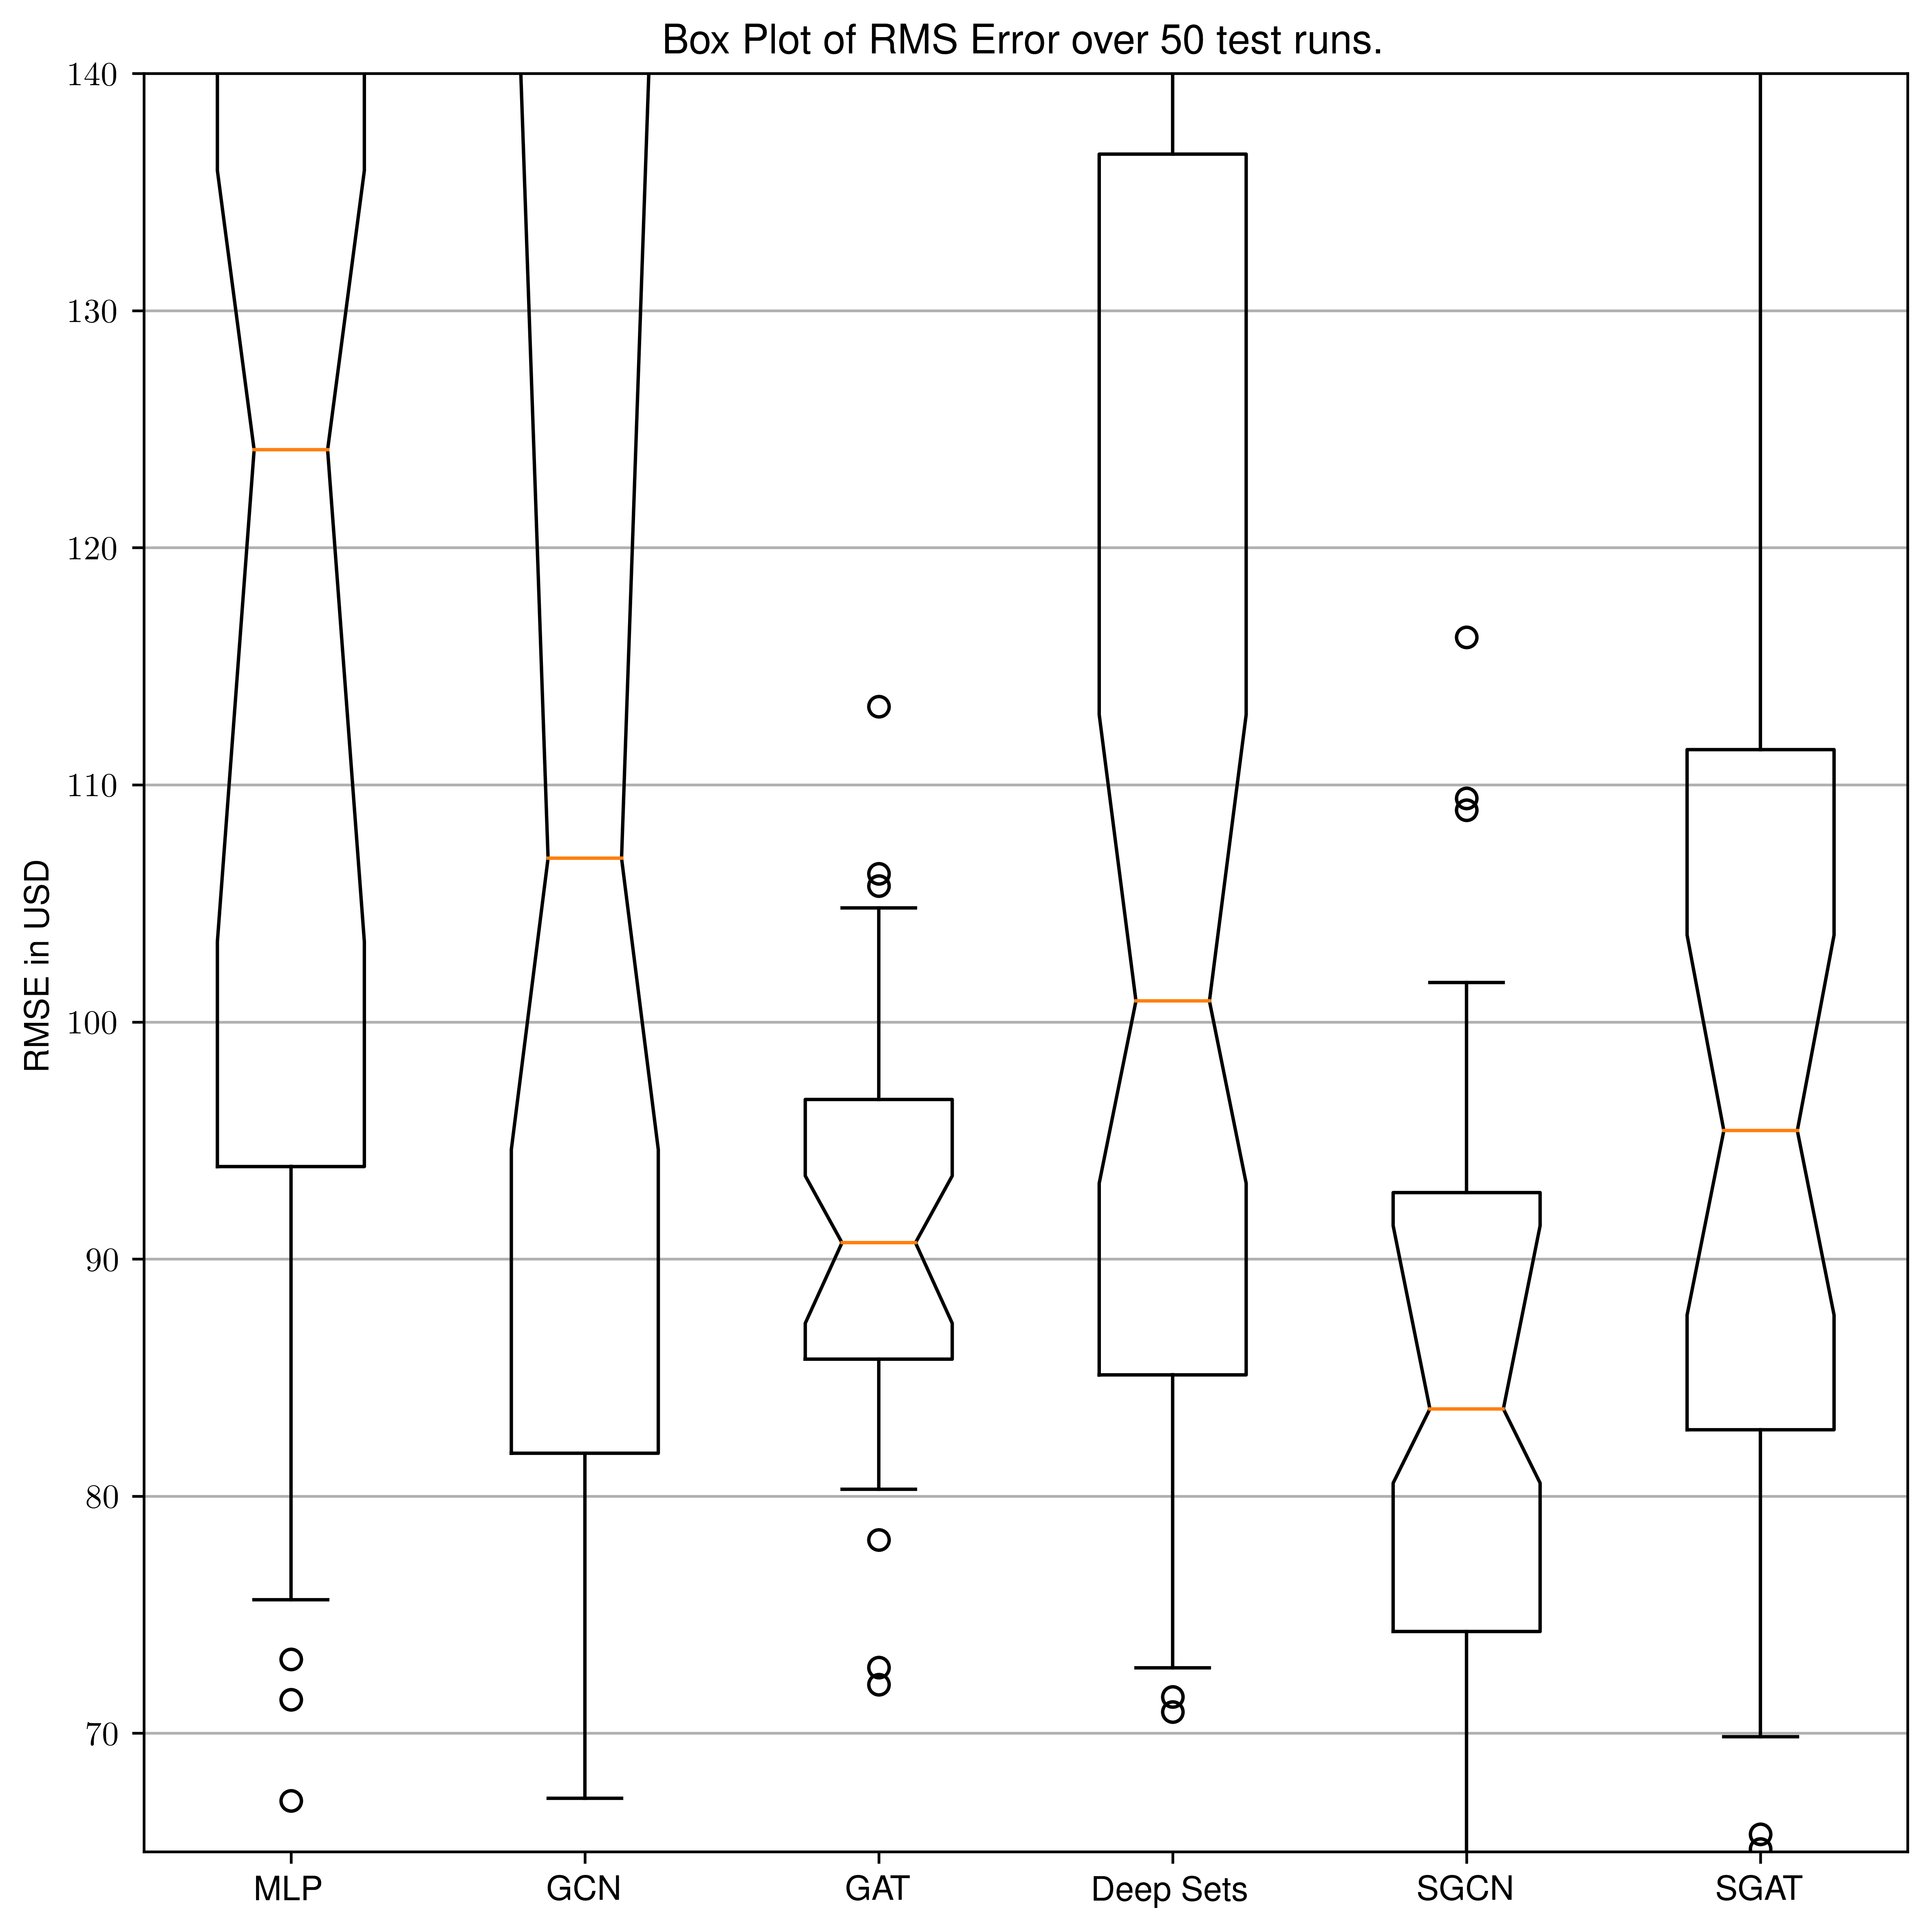

In [153]:
mpl.rcParams["figure.figsize"] = [8, 8]
mpl.rcParams['figure.dpi'] = 600

fig, ax = plt.subplots()
plt.boxplot([x[:,0],x[:,1], x[:,2], x[:,3], x[:,4], x[:,5]], bootstrap=1000, whis = [5, 95], meanline = False, notch = True)
labels = ['MLP', 'GCN', 'GAT', 'Deep Sets', 'SGCN', 'SGAT']
ax.set_ylabel('RMSE in USD')
ax.set_xticklabels(labels)
ax.set_title('Box Plot of RMS Error over 50 test runs.')
ax.yaxis.grid(True)
plt.ylim(65, 140)
plt.tight_layout()
# plt.savefig('boxplot.png')
plt.show()

In [155]:
print(bs.bootstrap(x[:,0], stat_func=bs_stats.mean))

127.29401167002689    (115.88306322775355, 138.20858689845628)


In [156]:
print(bs.bootstrap(x[:,1], stat_func=bs_stats.mean))

125.66534811693899    (112.02762875719193, 139.1272746014625)


In [157]:
print(bs.bootstrap(x[:,2], stat_func=bs_stats.mean))

91.19596746855436    (88.68978507411725, 93.66113012237896)


In [158]:
print(bs.bootstrap(x[:,3], stat_func=bs_stats.mean))

114.11225954452513    (103.36671590643779, 124.5324945781042)


In [159]:
print(bs.bootstrap(x[:,4], stat_func=bs_stats.mean))

83.93637672026767    (80.25361046605349, 87.58336226185544)


In [160]:
print(bs.bootstrap(x[:,5], stat_func=bs_stats.mean))

102.01183385436416    (93.85028624874015, 109.49126397227833)


In [161]:
model_means = np.array([127.29, 125.66, 91.19, 114.11, 83.93, 102.01])
lower = np.array([116.36, 112.02, 88.72, 103.49, 80.28, 94.07])
upper = np.array([138.18, 138.94, 93.57, 124.40, 87.60, 109.51])

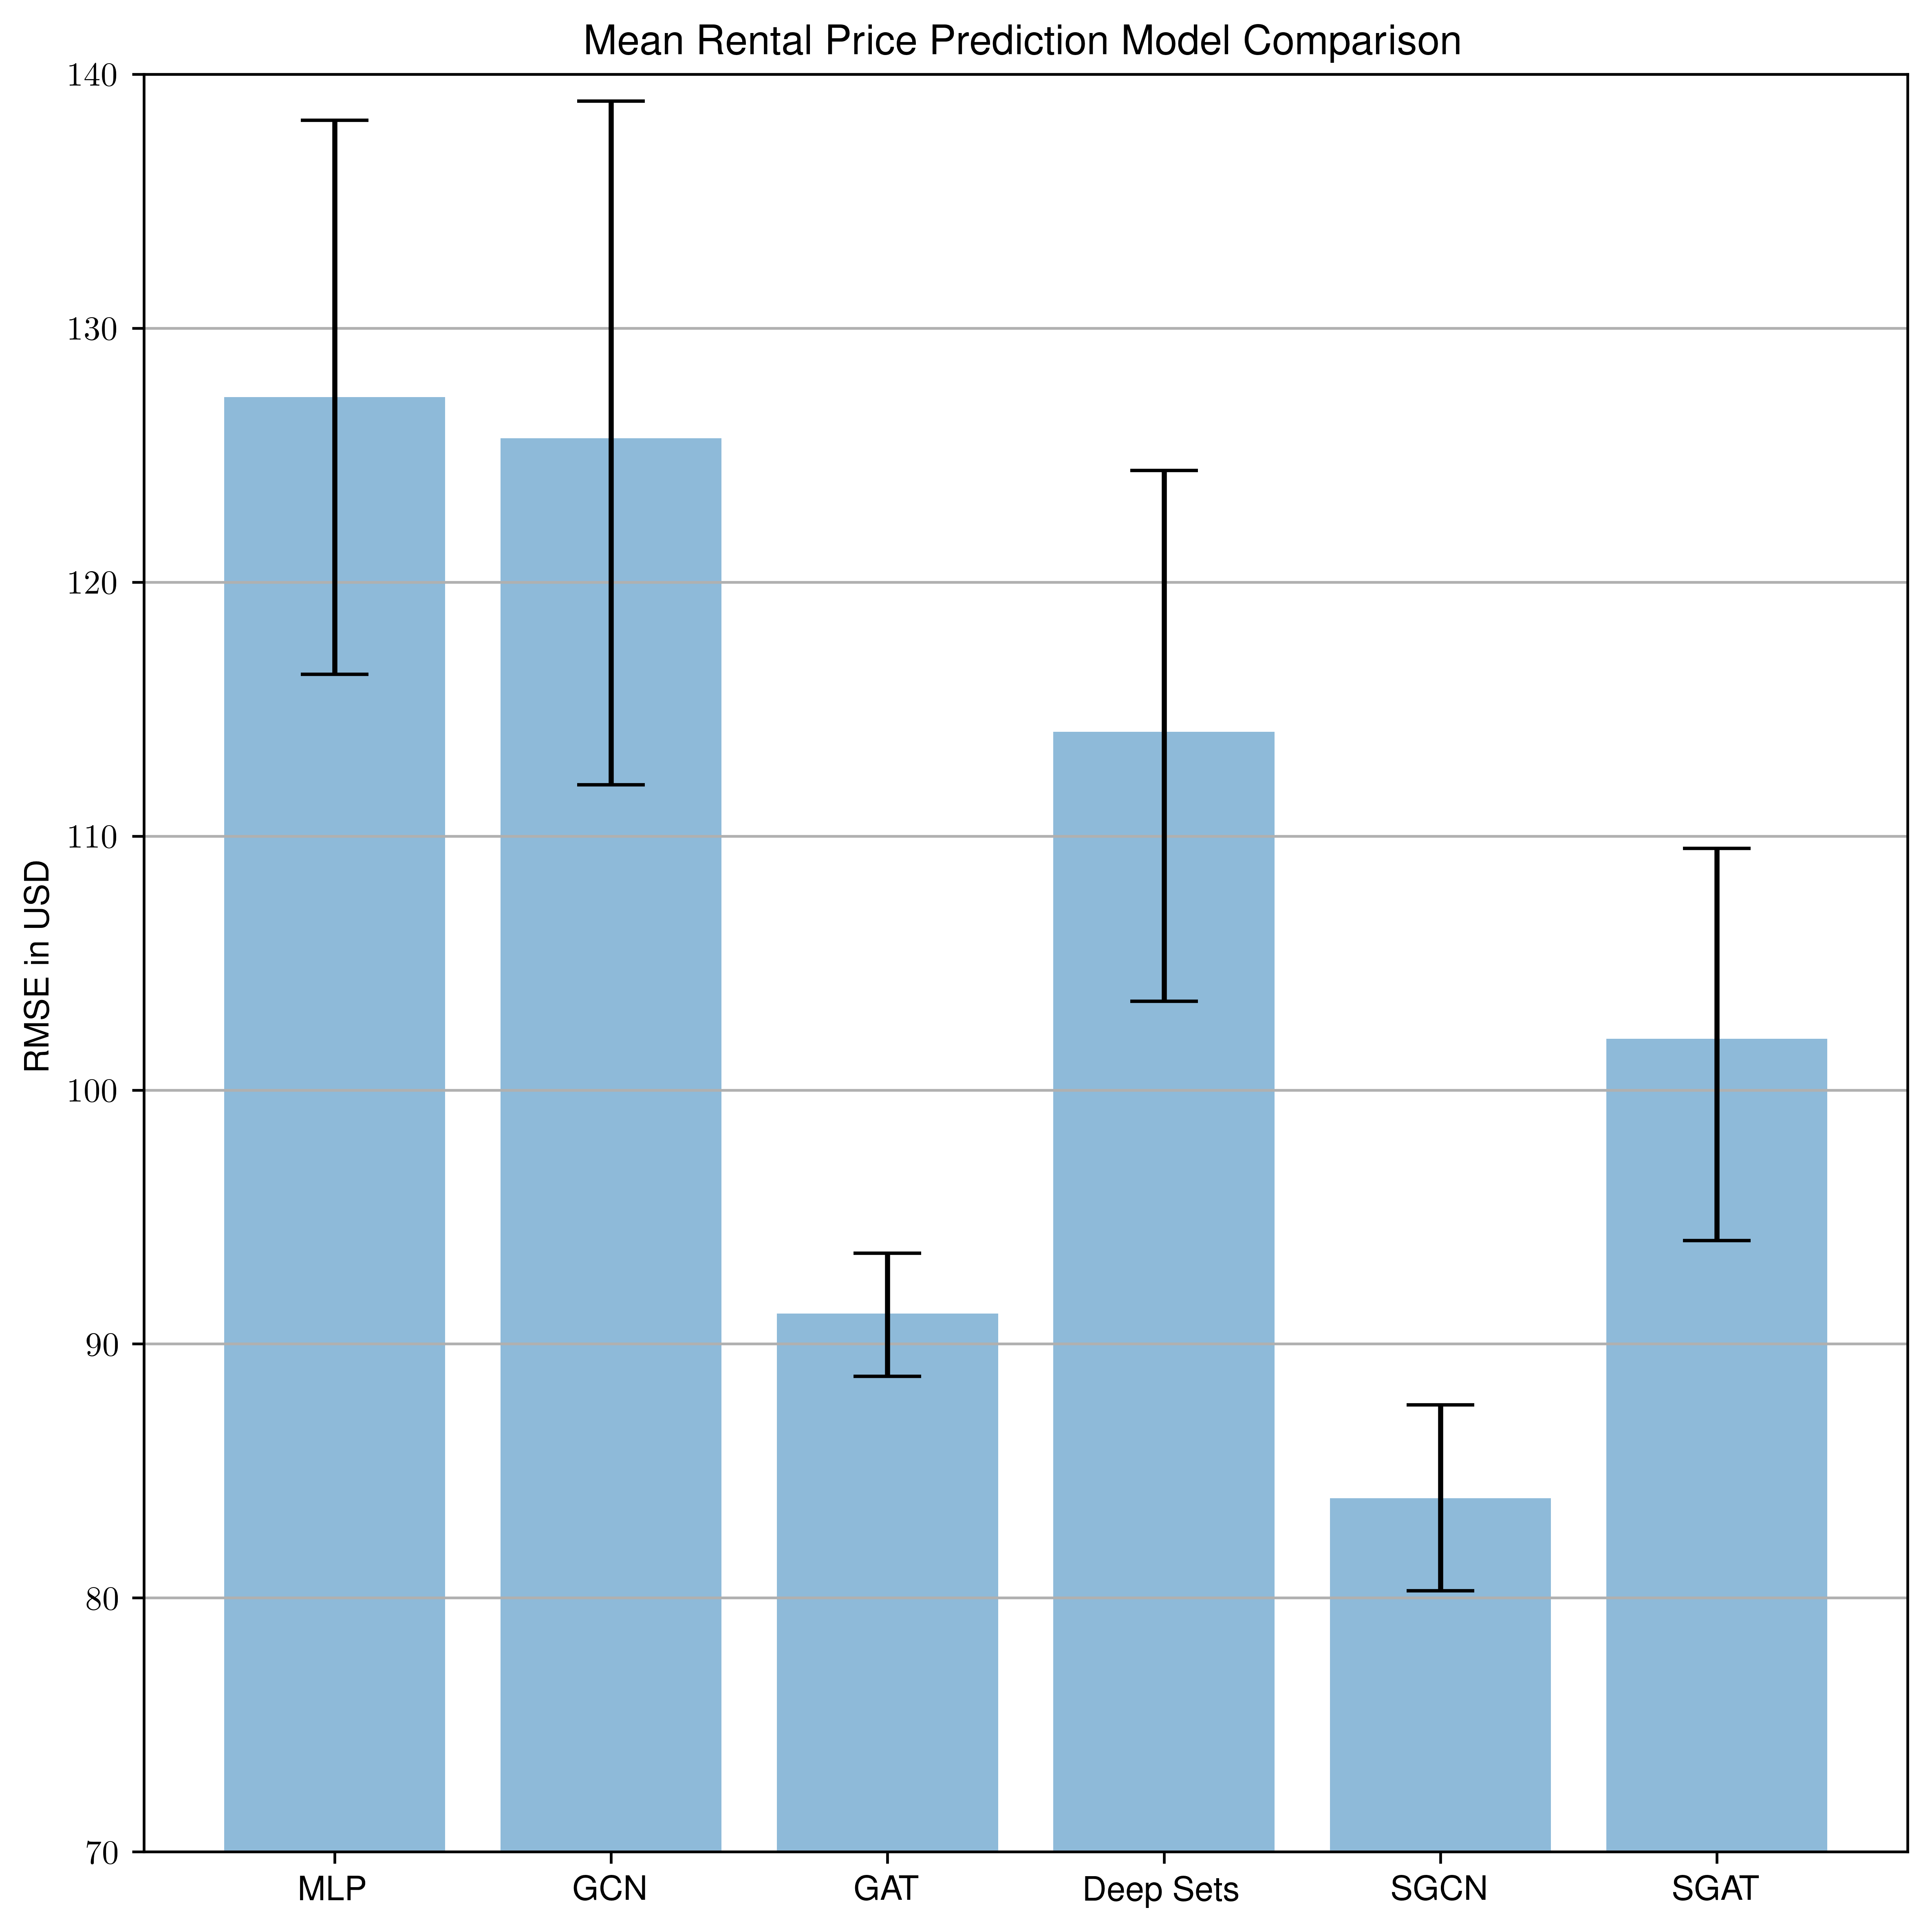

In [162]:
fig, ax = plt.subplots()
# Define labels, positions, bar heights and error bar heights
labels = ['MLP', 'GCN', 'GAT', 'Deep Sets', 'SGCN', 'SGAT']
x_pos = np.arange(len(labels))
mean = model_means
lower_error = mean - lower
upper_error = upper - mean
asymmetric_error = [lower_error, upper_error]


ax.bar(x_pos, mean,
       yerr=asymmetric_error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('RMSE in USD')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Rental Price Prediction Model Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.ylim(70, 140)
# plt.savefig('bar_plot_with_error_bars_asym.png')
plt.show()

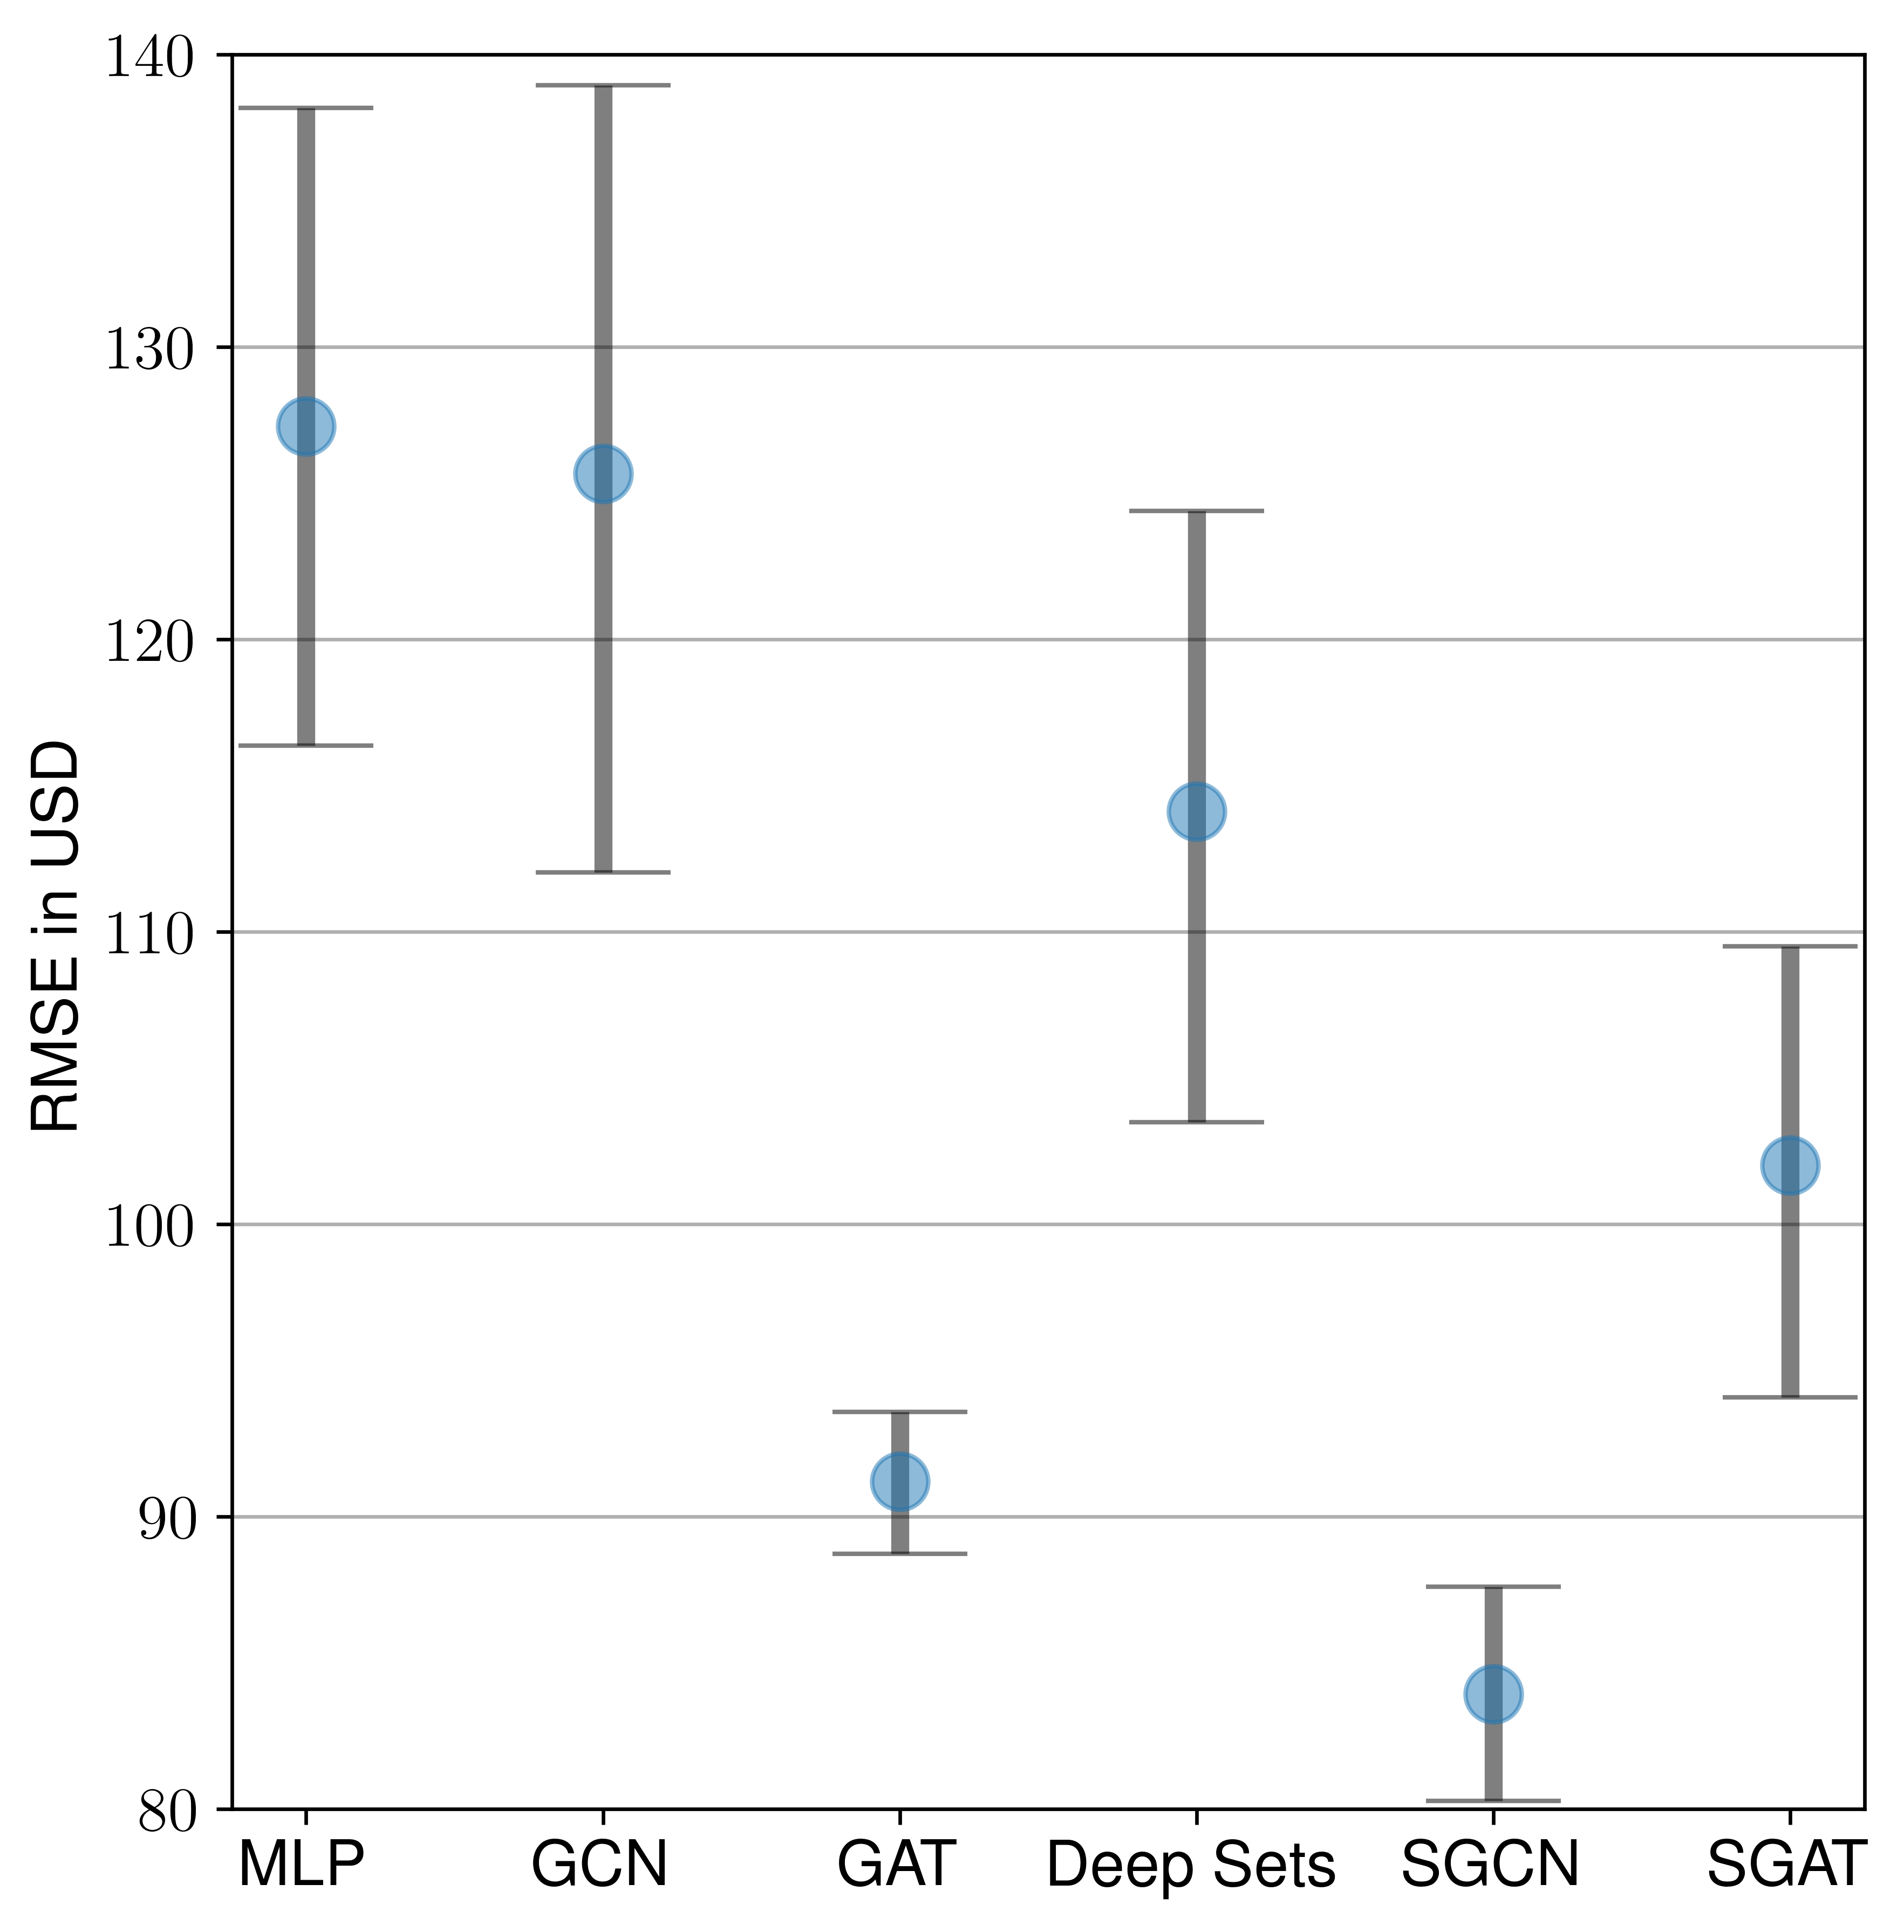

In [189]:
mpl.rcParams["figure.figsize"] = [6, 6]
fig, ax = plt.subplots()
# Define labels, positions, bar heights and error bar heights
labels = ['MLP', 'GCN', 'GAT', 'Deep Sets', 'SGCN', 'SGAT']
x_pos = np.arange(len(labels))
mean = model_means
lower_error = mean - lower
upper_error = upper - mean
asymmetric_error = [lower_error, upper_error]


ax.errorbar(x = x_pos, y = mean,
       yerr=asymmetric_error,
       alpha=0.5,
       ecolor='black',
       fmt = '.',
       capsize=15,
       markersize='25',
       elinewidth = 4)
plt.ylabel('RMSE in USD', fontsize = 14)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 14)
# ax.set_title('Mean Rental Price Prediction Model Comparison')
ax.yaxis.grid(True)
plt.yticks(fontsize=14)

# Save the figure and show
plt.tight_layout()
plt.ylim(80, 140)
# plt.savefig('bar_plot_with_error_bars_asym.png')
plt.show()

In [168]:
lower_error

array([10.93, 13.64,  2.47, 10.62,  3.65,  7.94])

In [169]:
upper_error

array([10.89, 13.28,  2.38, 10.29,  3.67,  7.5 ])

In [170]:
mean

array([127.29, 125.66,  91.19, 114.11,  83.93, 102.01])

Stack two 50-runs and test again

In [191]:
k = pd.read_csv('test_log_3.csv').append(pd.read_csv('test_log_2.csv'), ignore_index=True).values

In [197]:
corrected_dependent_ttest(k[:,0],k[:,4], 85, 15, 0.5)

(1.5569865636262858, 99, 6.654773413926694e-17, 0.12266482033571391)

In [198]:
corrected_dependent_ttest(k[:,1],k[:,4], 85, 15, 0.5)

(0.9542937579583806, 99, 6.654773413926694e-17, 0.34225930076789246)

In [199]:
corrected_dependent_ttest(k[:,2],k[:,4], 85, 15, 0.5)

(1.4523214512556641, 99, 6.654773413926694e-17, 0.14957428586295363)

In [200]:
corrected_dependent_ttest(k[:,3],k[:,4], 85, 15, 0.5)

(1.5299707446785749, 99, 6.654773413926694e-17, 0.12921309391649372)

In [201]:
corrected_dependent_ttest(k[:,5],k[:,4], 85, 15, 0.5)

(1.1538042715098766, 99, 6.654773413926694e-17, 0.2513582841553612)